In [1]:
import keras
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../CustomLayers/')
from CustomLayers import *
from keras.layers import Input, Convolution2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, AveragePooling2D, Activation, Reshape
from keras.layers.advanced_activations import PReLU
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import optimizers
from PIL import Image

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

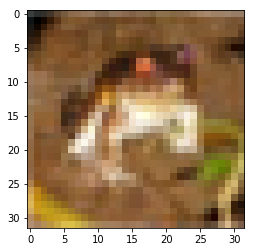

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
img_w = 32
img_h = 32
img_c = 3
inp = Input(shape=(img_w, img_h, img_c))

z = Convolution2D(32, (3,3), activation='relu')(inp)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
#z = Convolution2D(32, (3,3), activation='relu')(z)
z = BinLayer()(z)
z = BinConv(128, (3,3), kernel_regularizer=BinReg(), padding='same')(z)
z = PReLU()(z)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
z = BinLayer()(z)
z = BinConv(128, (3,3), kernel_regularizer=BinReg(), padding='same')(z)
z = PReLU()(z)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
z = Convolution2D(10, (1,1), activation='relu')(z)
z = AveragePooling2D(pool_size=(int(z.shape[1]), int(z.shape[2])))(z)
z = Reshape((10,))(z)
z = Activation('softmax')(z)

model = Model(inputs=inp, outputs=z)

In [6]:
sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay=.0005)
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=50, verbose=1,
          validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s - loss: 2.0078 - acc: 0.4872 - val_loss: 2.0420 - val_acc: 0.4661
Epoch 2/50
50000/50000 [==============================] - 10s - loss: 1.6890 - acc: 0.6016 - val_loss: 1.9213 - val_acc: 0.5300
Epoch 3/50
50000/50000 [==============================] - 10s - loss: 1.5594 - acc: 0.6502 - val_loss: 2.0149 - val_acc: 0.5216
Epoch 4/50
50000/50000 [==============================] - 10s - loss: 1.4790 - acc: 0.6767 - val_loss: 1.6564 - val_acc: 0.6105
Epoch 5/50
50000/50000 [==============================] - 10s - loss: 1.4223 - acc: 0.6966 - val_loss: 1.6212 - val_acc: 0.6255
Epoch 6/50
50000/50000 [==============================] - 10s - loss: 1.3776 - acc: 0.7102 - val_loss: 2.3960 - val_acc: 0.4077
Epoch 7/50
50000/50000 [==============================] - 10s - loss: 1.3379 - acc: 0.7240 - val_loss: 1.7174 - val_acc: 0.6038
Epoch 8/50
50000/50000 [==============================

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[1.2042350746154784, 0.71579999999999999]

In [9]:
g = tf.get_default_graph()
g.get_operations()

[<tf.Operation 'input_1' type=Placeholder>,
 <tf.Operation 'conv2d_1/random_uniform/shape' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/min' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/max' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'conv2d_1/random_uniform/sub' type=Sub>,
 <tf.Operation 'conv2d_1/random_uniform/mul' type=Mul>,
 <tf.Operation 'conv2d_1/random_uniform' type=Add>,
 <tf.Operation 'conv2d_1/kernel' type=VariableV2>,
 <tf.Operation 'conv2d_1/kernel/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/kernel/read' type=Identity>,
 <tf.Operation 'conv2d_1/Const' type=Const>,
 <tf.Operation 'conv2d_1/bias' type=VariableV2>,
 <tf.Operation 'conv2d_1/bias/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/bias/read' type=Identity>,
 <tf.Operation 'conv2d_1/convolution/Shape' type=Const>,
 <tf.Operation 'conv2d_1/convolution/dilation_rate' type=Const>,
 <tf.Operation 'conv2d_1/convolution' type=Conv2D>,
 <tf.Oper

In [10]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="float32" )
    data = data/255
    return data

In [11]:
image = load_image("/data/cifar/test/deer/1462_deer.png")
image = image.reshape((1,)+image.shape)

In [12]:
guess = (model.predict(image))
guess

array([[  3.40699517e-05,   3.40699517e-05,   3.96955051e-02,
          2.74578184e-02,   9.21354175e-01,   1.07757077e-02,
          2.01089526e-04,   3.43297492e-04,   7.03202313e-05,
          3.40699517e-05]], dtype=float32)

In [13]:
cifar_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifar_labels[np.argmax(guess)]

'deer'